Mounting Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation

/content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation


Environment

In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


Test - CLI

In [ ]:
!yolo segment predict model=yolov8l-seg.pt source="inference/people.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation/inference/people.jpg: 480x640 5 persons, 1 cup, 2 chairs, 2 potted plants, 1 vase, 89.8ms
Speed: 3.7ms preprocess, 89.8ms inference, 131.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


[INFO] - 1:  (2591, 3600, 3)
[INFO] - 2:  (460, 640, 3)


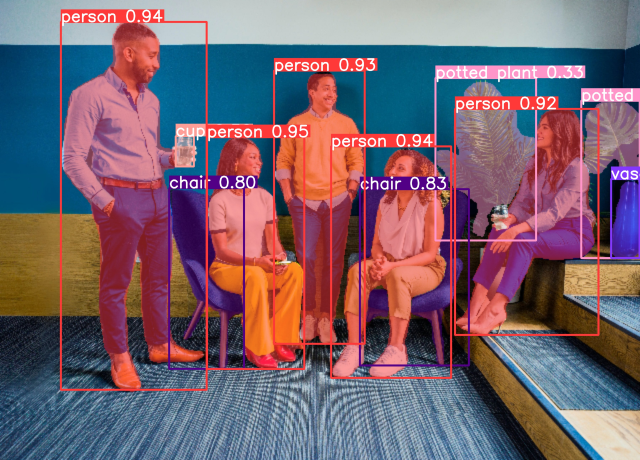

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path = "runs/segment/predict2/people.jpg"
img = cv2.imread(path)
print("[INFO] - 1: ",img.shape)

img = imutils.resize(img, width=640)
print("[INFO] - 2: ",img.shape)

cv2_imshow(img)

In [ ]:
!yolo segment predict model=yolov8l-seg.pt source="inference/people.jpg" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation/inference/people.jpg: 480x640 5 persons, 1 cup, 2 chairs, 2 potted plants, 1 vase, 87.9ms
Speed: 3.6ms preprocess, 87.9ms inference, 104.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


[INFO] - 1:  (2591, 3600, 3)
[INFO] - 2:  (460, 640, 3)


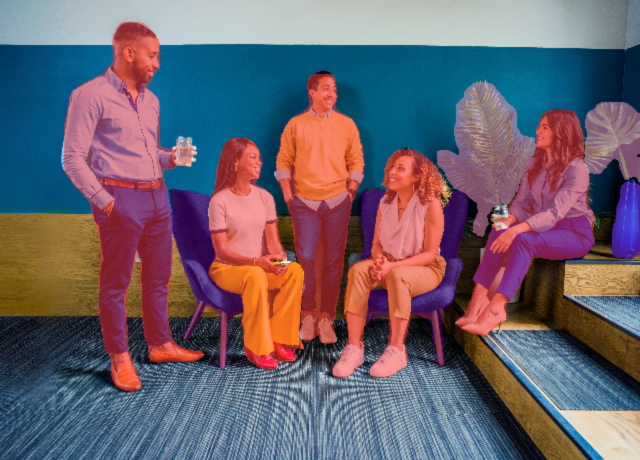

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path = "runs/segment/predict3/people.jpg"
img = cv2.imread(path)
print("[INFO] - 1: ",img.shape)

img = imutils.resize(img, width=640)
print("[INFO] - 2: ",img.shape)

cv2_imshow(img)

Test - Python Implementation

Training

In [ ]:
!unzip data/road_surface_dataset.zip -d ./data

In [ ]:
!yolo segment train model=yolov8l-seg.pt data=data/data.yaml imgsz=640 workers=8 batch=8 device=0 epochs=50 name=yolov8_road_segmentation

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=data/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_road_segmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [ ]:
# !yolo segment train model=runs/.... resume=True

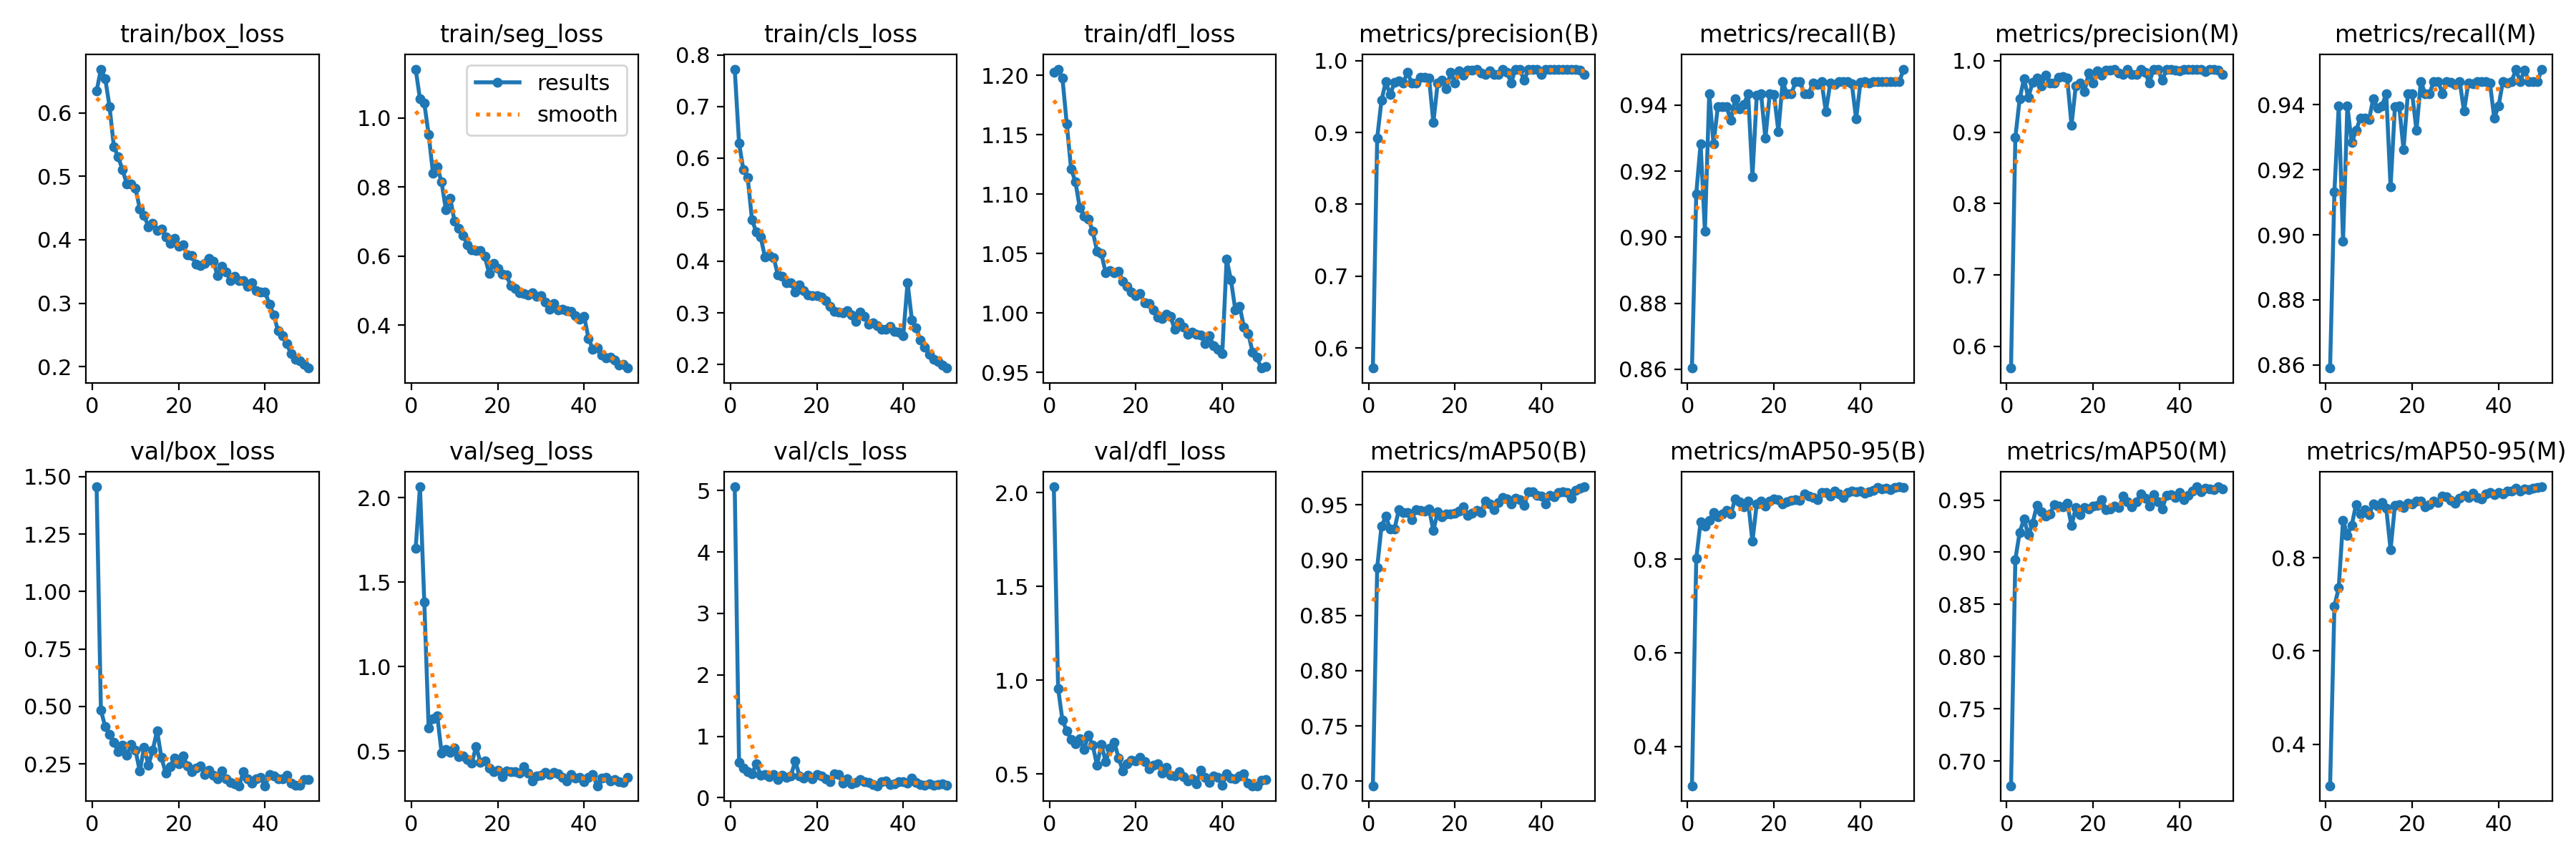

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/yolov8_road_segmentation/results.png"
img = cv2.imread(img_path)

cv2_imshow(img)

Prediction - CLI

In [ ]:
!yolo segment predict model="runs/segment/yolov8_road_segmentation/weights/best.pt" source= "data/test/images/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation/data/test/images/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg: 640x640 1 road, 76.4ms
Speed: 2.0ms preprocess, 76.4ms inference, 333.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


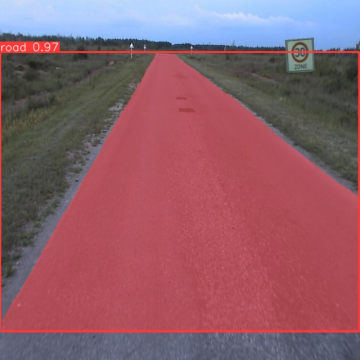

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict4/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

In [ ]:
!yolo segment predict model="runs/segment/yolov8_road_segmentation/weights/best.pt" source= "data/test/images/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation/data/test/images/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg: 640x640 1 road, 61.8ms
Speed: 2.1ms preprocess, 61.8ms inference, 105.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


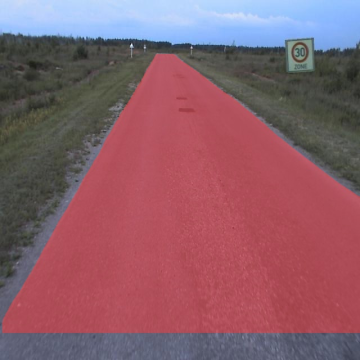

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict5/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

Error

In [ ]:
!yolo segment predict model="runs/segment/yolov8_road_segmentation/weights/best.pt" source= "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Road_in_Norway.jpg/1200px-Road_in_Norway.jpg" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

100% 209k/209k [00:00<00:00, 43.4MB/s]
image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation/1200px-Road_in_Norway.jpg: 448x640 1 road, 116.2ms
Speed: 3.4ms preprocess, 116.2ms inference, 103.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


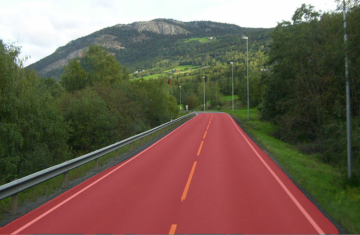

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict6/1200px-Road_in_Norway.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

In [ ]:
!yolo segment predict model="runs/segment/yolov8_road_segmentation/weights/best.pt" source= "https://nacto.org/wp-content/themes/sink_nacto/views/design-guides/retrofit/urban-street-design-guide/images/lane-width/carousel/driver_over_ctr_line.jpg" --hide_labels=True --boxes=False

WARNING ⚠️ '--hide_labels=True' does not require leading dashes '--', updating to 'hide_labels=True'.
WARNING ⚠️ '--boxes=False' does not require leading dashes '--', updating to 'boxes=False'.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

100% 585k/585k [00:00<00:00, 34.2MB/s]
image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Road Segmentation/driver_over_ctr_line.jpg: 480x640 1 road, 121.7ms
Speed: 3.6ms preprocess, 121.7ms inference, 79.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


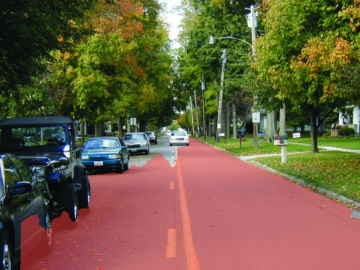

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/segment/predict7/driver_over_ctr_line.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

Prediction - Python Implementation

[INFO]... (640, 640, 3)



0: 640x640 1 road, 76.3ms
Speed: 1.7ms preprocess, 76.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict11


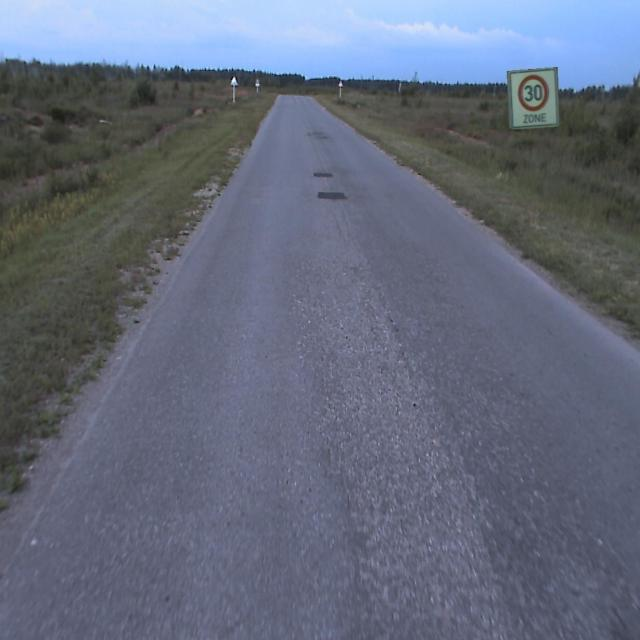

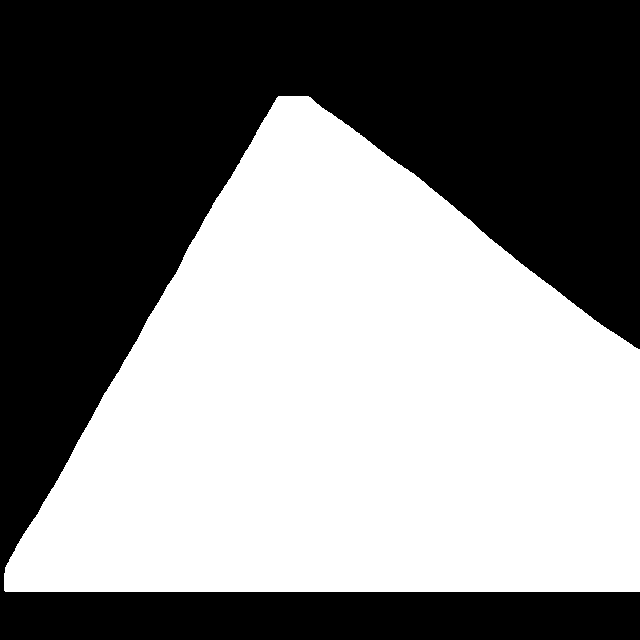

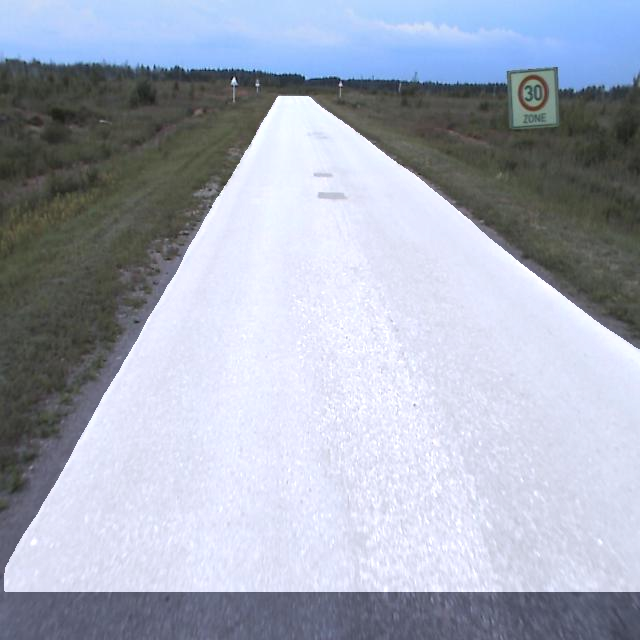

In [ ]:
import cv2
import torch
import imutils

import numpy as np
from ultralytics import YOLO


img_path = "data/test/images/00424_png.rf.0e15a86433e1b0e25d4344d1fab325ca.jpg"
model_path = "runs/segment/yolov8_road_segmentation/weights/best.pt"

img = cv2.imread(img_path)
print("[INFO]...",img.shape)

model = YOLO(model_path)

results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)

for result in results:
  masks = result.masks.data.cpu()
  boxes = result.boxes.data.cpu()
  clss = boxes[:, 5]

  road_indices = np.where(clss==0)
  road_masks = masks[road_indices]

  road_mask = torch.any(road_masks, dim=0).int()*255
  road_mask = road_mask.cpu().numpy()
  road_mask = road_mask.astype(np.uint8)


road_mask_color = cv2.cvtColor(road_mask, cv2.COLOR_GRAY2BGR)
result_img = cv2.addWeighted(img, 1, road_mask_color, 0.5, 0)

cv2_imshow(img)
cv2_imshow(road_mask)
cv2_imshow(result_img)

[INFO]... (640, 640, 3)



0: 640x640 1 road, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict13


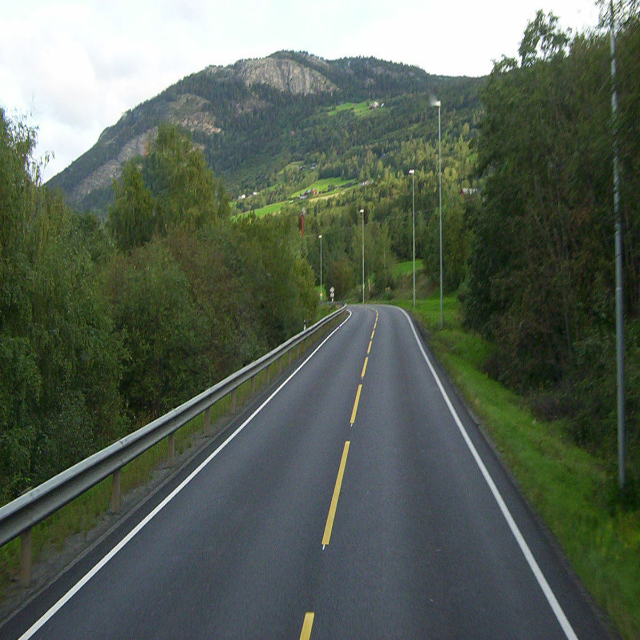

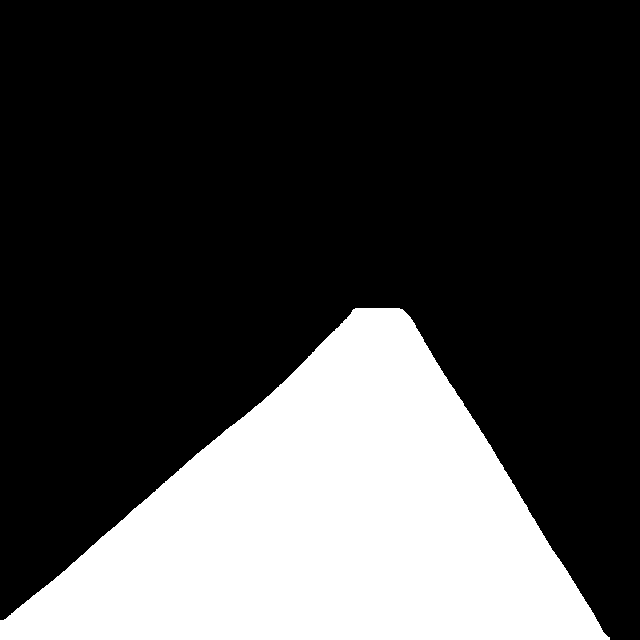

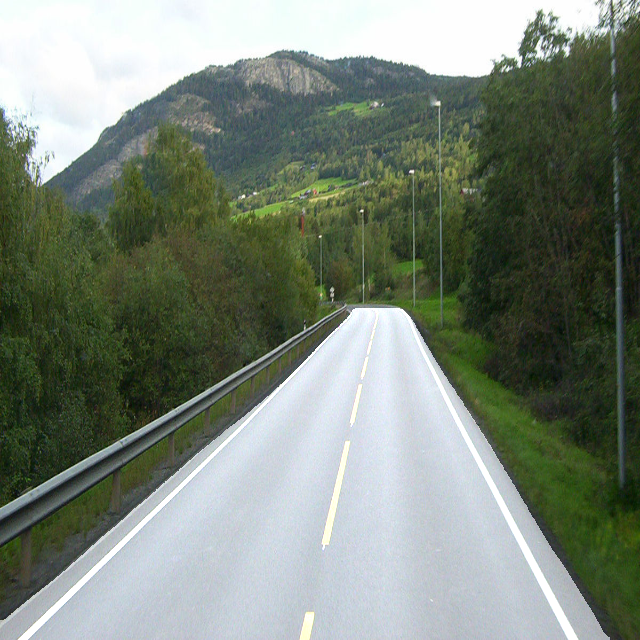

In [ ]:
import cv2
import torch
import imutils

import numpy as np
from ultralytics import YOLO


img_path = "1200px-Road_in_Norway.jpg"
model_path = "runs/segment/yolov8_road_segmentation/weights/best.pt"

img = cv2.imread(img_path)
img = cv2.resize(img, (640,640))

print("[INFO]...",img.shape)

model = YOLO(model_path)

results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)

for result in results:
  masks = result.masks.data.cpu()
  boxes = result.boxes.data.cpu()
  clss = boxes[:, 5]

  road_indices = np.where(clss==0)
  road_masks = masks[road_indices]

  road_mask = torch.any(road_masks, dim=0).int()*255
  road_mask = road_mask.cpu().numpy()
  road_mask = road_mask.astype(np.uint8)


road_mask_color = cv2.cvtColor(road_mask, cv2.COLOR_GRAY2BGR)
result_img = cv2.addWeighted(img, 1, road_mask_color, 0.5, 0)

cv2_imshow(img)
cv2_imshow(road_mask)
cv2_imshow(result_img)